Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn


In [153]:
import pandas as pd
import numpy as np
import random
from faker import Faker

faker = Faker()

In [154]:
def generate_customer_data(n=1000):
    data = []

    for i in range(n):
        customer_id = i
        age = random.randint(18, 70)
        gender = random.choice(["Male", "Female"])
        annual_income = round(np.random.normal(50000, 15000), 2)
        total_spend = round(np.random.normal(1000, 300), 2)
        years_as_customer = random.randint(0, 10)
        num_of_purchases = random.randint(1, 100)
        avg_transaction = round(np.random.normal(80, 20), 2)
        num_of_returns = random.randint(0, 5)
        num_of_support = random.randint(0, 10)
        satisfaction = random.randint(1, 5)
        days_ago = random.randint(1, 100)
        email_opt_in = random.choice([True, False])
        promotion_response = random.choice(["Responded", "Ignored", "Unsubscribed"])

        # 이탈 조건 점수 (약간 완화)
        churn_score = 0
        if total_spend < 600: churn_score += 1
        if satisfaction <= 2: churn_score += 1
        if num_of_support >= 6: churn_score += 1
        if days_ago >= 70: churn_score += 1
        if years_as_customer <= 1: churn_score += 1

        # 눈치껏 살짝 랜덤성 섞기
        if churn_score >= 2:
            target_churn = random.random() < 0.8  # 높은 확률로 True
        else:
            target_churn = random.random() < 0.2  # 낮은 확률로 True

        data.append([
            customer_id, age, gender, annual_income, total_spend, years_as_customer,
            num_of_purchases, avg_transaction, num_of_returns, num_of_support,
            satisfaction, days_ago, email_opt_in, promotion_response, target_churn
        ])

    columns = [
        "Customer_ID", "Age", "Gender", "Annual_Income", "Total_Spend", "Years_as_Customer",
        "Num_of_Purchases", "Average_Transaction_Amount", "Num_of_Returns", "Num_of_Support_Contacts",
        "Satisfaction_Score", "Last_Purchase_Days_Ago", "Email_Opt_In",
        "Promotion_Response", "Target_Churn"
    ]

    return pd.DataFrame(data, columns=columns)


In [155]:
df = generate_customer_data(30000)
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,0,44,Male,42734.73,976.12,8,68,88.00,5,2,4,74,False,Unsubscribed,True
1,1,50,Male,58406.05,1366.35,6,100,83.54,5,1,1,23,True,Unsubscribed,False
2,2,40,Male,56213.56,1083.53,7,28,41.76,5,9,4,66,True,Ignored,False
3,3,40,Male,46059.51,830.69,10,80,98.33,2,9,4,81,True,Unsubscribed,True
4,4,69,Female,42637.60,313.34,7,100,80.50,5,2,3,73,True,Responded,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,57,Female,72550.45,684.88,5,7,82.16,3,3,5,41,False,Responded,False
29996,29996,39,Male,28129.13,1192.20,8,55,56.44,2,3,5,60,True,Ignored,False
29997,29997,33,Male,37693.13,911.01,10,38,93.57,2,7,2,95,True,Ignored,False
29998,29998,67,Female,24516.62,1003.26,7,87,79.78,4,8,1,97,True,Unsubscribed,True


In [156]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 30000 non-null  int64  
 1   Age                         30000 non-null  int64  
 2   Gender                      30000 non-null  object 
 3   Annual_Income               30000 non-null  float64
 4   Total_Spend                 30000 non-null  float64
 5   Years_as_Customer           30000 non-null  int64  
 6   Num_of_Purchases            30000 non-null  int64  
 7   Average_Transaction_Amount  30000 non-null  float64
 8   Num_of_Returns              30000 non-null  int64  
 9   Num_of_Support_Contacts     30000 non-null  int64  
 10  Satisfaction_Score          30000 non-null  int64  
 11  Last_Purchase_Days_Ago      30000 non-null  int64  
 12  Email_Opt_In                30000 non-null  bool   
 13  Promotion_Response          300

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,43.859400,49962.759920,999.321779,4.972767,50.868400,80.058973,2.495433,5.014533,3.001000,50.471867
std,8660.398374,15.329921,14917.414678,298.561339,3.165779,28.920919,20.098883,1.705386,3.153292,1.413034,28.823708
min,0.000000,18.000000,-6220.860000,-180.480000,0.000000,1.000000,1.850000,0.000000,0.000000,1.000000,1.000000
25%,7499.750000,31.000000,39875.932500,798.330000,2.000000,26.000000,66.490000,1.000000,2.000000,2.000000,26.000000
50%,14999.500000,44.000000,49857.490000,1002.050000,5.000000,51.000000,80.050000,2.000000,5.000000,3.000000,50.000000
75%,22499.250000,57.000000,60180.190000,1199.960000,8.000000,76.000000,93.572500,4.000000,8.000000,4.000000,75.000000
max,29999.000000,70.000000,112480.310000,2181.450000,10.000000,100.000000,173.970000,5.000000,10.000000,5.000000,100.000000


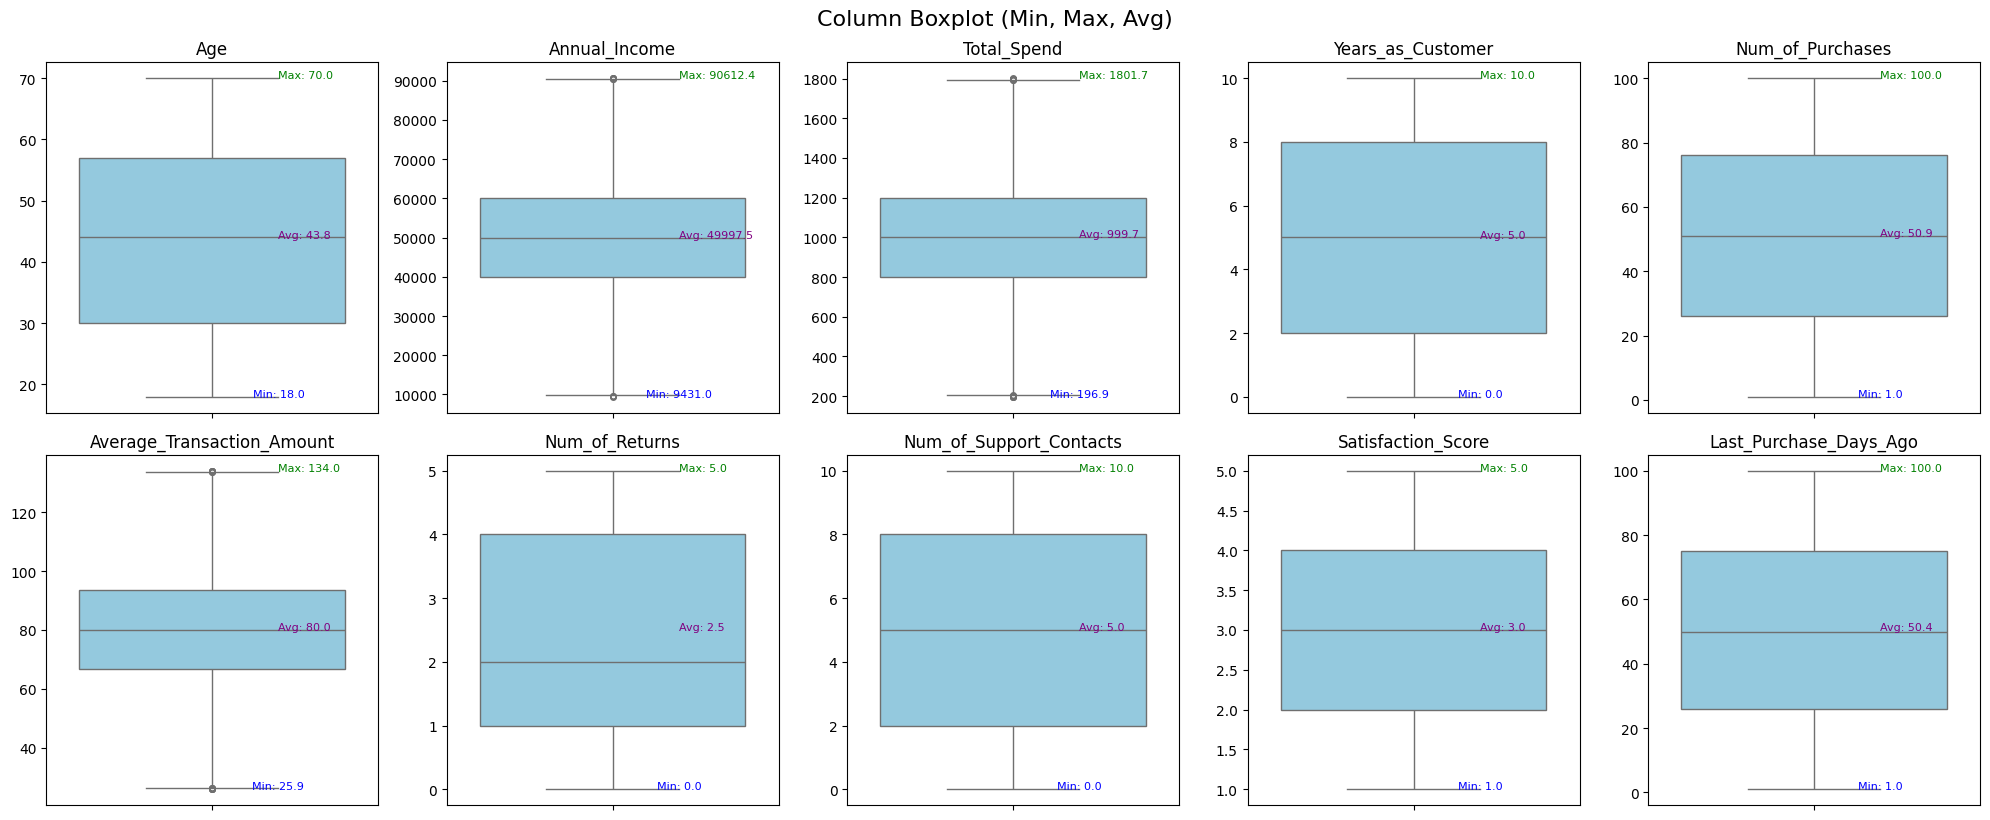

Target_Churn
False    15528
True     13797
Name: count, dtype: int64

In [169]:
# 이상치 찾기
# 나이, 연간소득, 총지출액, 고객유지연도수
# 1년 구매 횟수, 거래 지출 평균 금액, 품목수, 지원팀 문의 횟수
# 만족도, 마지막 구매 이후 경과 일수

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼 리스트
numeric_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                'Num_of_Purchases', 'Average_Transaction_Amount',
                'Num_of_Returns', 'Num_of_Support_Contacts',
                'Satisfaction_Score', 'Last_Purchase_Days_Ago']

# subplot 행/열 수 설정
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # boxplot 그리기 (이상치 강조 스타일 설정)
    sns.boxplot(y=df[col], color='skyblue',
                flierprops=dict(marker='o', color='red', markersize=4))  # 이상치 붉은 점으로 표시
    
    # 통계값 계산
    col_min = df[col].min()
    col_max = df[col].max()
    col_mean = df[col].mean()
    
    # 텍스트로 표시 (y축 기준, x=0.2 부근)
    plt.text(0.2, col_min, f"Min: {col_min:.1f}", ha='center', fontsize=8, color='blue')
    plt.text(0.2, col_max, f"Max: {col_max:.1f}", fontsize=8, color='green')
    plt.text(0.2, col_mean, f"Avg: {col_mean:.1f}", fontsize=8, color='purple')
    
    plt.title(col)
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Column Boxplot (Min, Max, Avg)", fontsize=16, y=1.02)
plt.show()

df['Target_Churn'].value_counts()

In [158]:
def remove_outliers_iqr(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # 이상치가 아닌 데이터만 남김
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


In [159]:
numeric_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                'Num_of_Purchases', 'Average_Transaction_Amount',
                'Num_of_Returns', 'Num_of_Support_Contacts',
                'Satisfaction_Score', 'Last_Purchase_Days_Ago']

df = remove_outliers_iqr(df, numeric_cols)
print(f"제거 전 데이터 수: {len(df)}, 제거 후: {len(df)}")


제거 전 데이터 수: 29325, 제거 후: 29325


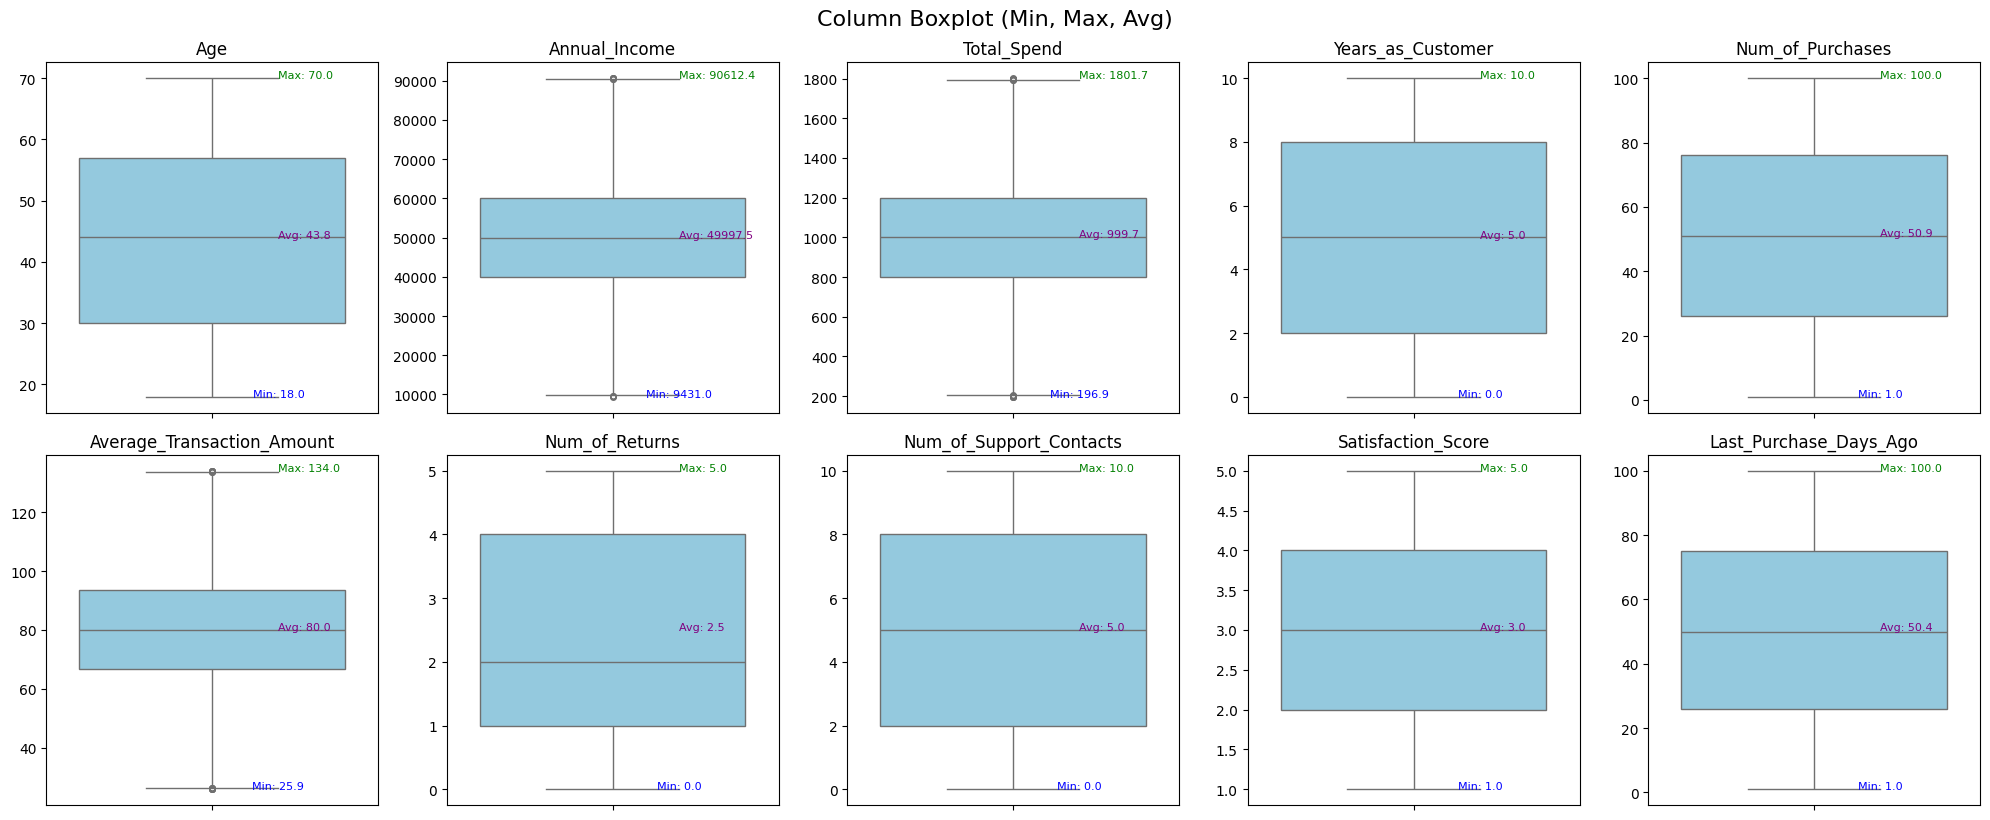

In [160]:
# 이상치 찾기
# 나이, 연간소득, 총지출액, 고객유지연도수
# 1년 구매 횟수, 거래 지출 평균 금액, 품목수, 지원팀 문의 횟수
# 만족도, 마지막 구매 이후 경과 일수

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼 리스트
numeric_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                'Num_of_Purchases', 'Average_Transaction_Amount',
                'Num_of_Returns', 'Num_of_Support_Contacts',
                'Satisfaction_Score', 'Last_Purchase_Days_Ago']

# subplot 행/열 수 설정
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # boxplot 그리기 (이상치 강조 스타일 설정)
    sns.boxplot(y=df[col], color='skyblue',
                flierprops=dict(marker='o', color='red', markersize=4))  # 이상치 붉은 점으로 표시
    
    # 통계값 계산
    col_min = df[col].min()
    col_max = df[col].max()
    col_mean = df[col].mean()
    
    # 텍스트로 표시 (y축 기준, x=0.2 부근)
    plt.text(0.2, col_min, f"Min: {col_min:.1f}", ha='center', fontsize=8, color='blue')
    plt.text(0.2, col_max, f"Max: {col_max:.1f}", fontsize=8, color='green')
    plt.text(0.2, col_mean, f"Avg: {col_mean:.1f}", fontsize=8, color='purple')
    
    plt.title(col)
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Column Boxplot (Min, Max, Avg)", fontsize=16, y=1.02)
plt.show()


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def drop_feature(df):
    return df.drop('Customer_ID', axis=1)

def gender_processed(df):
    df_gender_processed = df.copy()

# 'Other'를 정확히 반반으로 나누어 'Male' / 'Female'로 분산
    other_idx = df_gender_processed[df_gender_processed['Gender'] == 'Other'].index
    half = len(other_idx) // 2
    df_gender_processed.loc[other_idx[:half], 'Gender'] = 'Male'
    df_gender_processed.loc[other_idx[half:], 'Gender'] = 'Female'

    return df_gender_processed

def remove_gender_other(df):
    """Gender가 'Other'인 행 제거"""
    df_cleaned = df[df['Gender'] != 'Other'].copy()
    return df_cleaned

def encode_feature(df):
    # 원핫 인코딩 대상 컬럼
    category = ['Gender', 'Email_Opt_In', 'Promotion_Response']
    
    # 원핫 인코딩 적용 (drop_first=True는 다중공선성 회피용, 상황에 따라 False로 해도 OK)
    df_encoded = pd.get_dummies(df, columns=category, drop_first=True)
    
    return df_encoded

def scale_feature(train_data, test_data):

    # 스케일러 적용
    sc = StandardScaler()
    # sc = MinMaxScaler()

    train_scaled = sc.fit_transform(train_data)
    test_scaled = sc.transform(test_data)


    return train_scaled, test_scaled

def preprocess_data(df):
    df = drop_feature(df)
    df = remove_gender_other(df)
    df = encode_feature(df)

    return df

In [162]:
from sklearn.model_selection import train_test_split
# 1. 전처리
rt_df = preprocess_data(df)

X = rt_df.drop('Target_Churn', axis=1)
y = rt_df['Target_Churn'].astype(int)

# 2. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. 수치형 컬럼만 스케일링
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_scaled_train = X_train.copy()
X_scaled_test = X_test.copy()

X_scaled_train[numeric_cols], X_scaled_test[numeric_cols] = scale_feature(
    X_train[numeric_cols], X_test[numeric_cols]
)
X_scaled_train.head()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Gender_Male,Email_Opt_In_True,Promotion_Response_Responded,Promotion_Response_Unsubscribed
20367,-1.160897,0.471739,-1.103115,1.269219,-1.104486,-1.436969,0.295632,1.261562,-1.413923,-0.851952,True,False,False,True
27798,-0.704472,-1.180092,0.606860,0.322149,0.417107,0.248144,-0.876703,1.261562,1.407909,-1.476156,True,False,False,False
16911,1.577648,0.049337,-0.866459,1.269219,-0.274526,-0.044471,-1.462871,-0.323227,-0.708465,-0.089035,False,False,False,False
9224,-1.226100,-0.850700,1.518230,1.269219,-0.101618,-0.752311,-1.462871,-1.591057,1.407909,1.159374,False,False,True,False
11707,-1.226100,-0.110615,-0.858071,0.006459,-0.447434,-0.622489,0.295632,0.944604,-0.708465,-1.406800,False,True,False,False


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_scaled_train, y_train)
y_pred = lr.predict(X_scaled_test)

print(f'훈련 데이터: {lr.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {lr.score(X_scaled_test, y_test):.2f}')
print(classification_report(y_test, y_pred))


훈련 데이터: 0.69
테스트 데이터: 0.69
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3110
           1       0.67      0.69      0.68      2755

    accuracy                           0.69      5865
   macro avg       0.69      0.69      0.69      5865
weighted avg       0.70      0.69      0.69      5865



In [164]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, max_depth=3, class_weight='balanced')
rf.fit(X_scaled_train, y_train)
y_pred = rf.predict(X_scaled_test)

print(f'훈련 데이터: {rf.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {rf.score(X_scaled_test, y_test):.2f}')
print(classification_report(y_test, y_pred))

훈련 데이터: 0.80
테스트 데이터: 0.80
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3110
           1       0.81      0.76      0.79      2755

    accuracy                           0.80      5865
   macro avg       0.81      0.80      0.80      5865
weighted avg       0.81      0.80      0.80      5865



In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 파라미터 후보 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# 랜덤포레스트 모델과 그리드서치 객체 생성
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=1)

# 학습
grid_search.fit(X_scaled_train, y_train)

# 결과 출력
print(" 최적 하이퍼파라미터:", grid_search.best_params_)
print(" 교차검증 평균 F1-score:", grid_search.best_score_)

# 테스트 데이터에 대한 최종 평가
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled_test)

print("\n 테스트 데이터 평가 결과:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
 최적 하이퍼파라미터: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 교차검증 평균 F1-score: 0.7808032658275383

 테스트 데이터 평가 결과:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3110
           1       0.81      0.77      0.79      2755

    accuracy                           0.80      5865
   macro avg       0.81      0.80      0.80      5865
weighted avg       0.80      0.80      0.80      5865



In [166]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# 목적 함수 정의
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 150),
        max_depth=trial.suggest_int("max_depth", 2, 7),
        min_samples_split=trial.suggest_int("min_samples_split", 10, 40),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 5, 30),
        max_leaf_nodes=trial.suggest_int("max_leaf_nodes", 10, 50),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        max_samples=trial.suggest_float("max_samples", 0.5, 0.9),
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    # ✅ StratifiedKFold로 클래스 비율 유지
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_scaled_train, y_train, scoring="f1", cv=cv)
    return score.mean()



# Optuna 스터디 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

# 최적 파라미터로 모델 학습
print("Best trial parameters:")
print(study.best_trial.params)

best_params = study.best_trial.params
# best_rf = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_scaled_train, y_train)

# 테스트셋 평가
y_pred = best_rf.predict(X_scaled_test)
print("📊 Classification Report (F1 기반 튜닝 + balanced):")
print(classification_report(y_test, y_pred))


[I 2025-03-31 20:47:27,621] A new study created in memory with name: no-name-4d522136-50f0-4de4-b0fa-1eb5bdd05ace
[I 2025-03-31 20:47:28,435] Trial 0 finished with value: 0.6909433867690244 and parameters: {'n_estimators': 75, 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 30, 'max_leaf_nodes': 43, 'max_features': 'sqrt', 'max_samples': 0.6222521624690531}. Best is trial 0 with value: 0.6909433867690244.
[I 2025-03-31 20:47:29,415] Trial 1 finished with value: 0.7653486027395385 and parameters: {'n_estimators': 84, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 21, 'max_leaf_nodes': 10, 'max_features': 'sqrt', 'max_samples': 0.748135409090383}. Best is trial 1 with value: 0.7653486027395385.
[I 2025-03-31 20:47:30,794] Trial 2 finished with value: 0.7737698906578979 and parameters: {'n_estimators': 123, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_leaf_nodes': 14, 'max_features': 'log2', 'max_samples': 0.7492061245536566}. Best is tri

Best trial parameters:
{'n_estimators': 136, 'max_depth': 7, 'min_samples_split': 34, 'min_samples_leaf': 30, 'max_leaf_nodes': 46, 'max_features': 'log2', 'max_samples': 0.6459665740206701}
📊 Classification Report (F1 기반 튜닝 + balanced):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3110
           1       0.81      0.77      0.79      2755

    accuracy                           0.81      5865
   macro avg       0.81      0.80      0.80      5865
weighted avg       0.81      0.81      0.80      5865



In [167]:
best_params = study.best_trial.params
best_rf = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
# best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_scaled_train, y_train)

# 테스트셋 평가
y_pred = best_rf.predict(X_scaled_test)
print("📊 Classification Report (F1 기반 튜닝 + balanced):")
print(classification_report(y_test, y_pred))

📊 Classification Report (F1 기반 튜닝 + balanced):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3110
           1       0.81      0.77      0.79      2755

    accuracy                           0.81      5865
   macro avg       0.81      0.80      0.80      5865
weighted avg       0.81      0.81      0.81      5865



In [171]:
print(f'훈련 데이터: {best_rf.score(X_scaled_train, y_train):.2f}')
print(f'테스트 데이터: {best_rf.score(X_scaled_test, y_test):.2f}')


훈련 데이터: 0.80
테스트 데이터: 0.81
